# Предсказание отклика банковских клиентов

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


<dl>
<dt> Описание колонок:
<dd>age - возраст клиента </dd>
<dd>job - тип работы </dd>
<dd>marital - статус замужества</dd>
<dd>education - степень образования </dd>
<dd>default - дефолтил ли клиент? </dd>
<dd>housing - есть ли жилищный кредит? </dd>
<dd>loan - есть ли потребительский кредит? </dd>
<dd>contact - тип коммуникации </dd>
<dd>month - месяц последнего контакта </dd>
<dd>day_of_week - день недели последнего контакта </dd>
<dd>duration - длительность последнего звонка - стоит убрать при обучении модели </dd>
<dd>campaign - количество звонков в течение маркетинговой кампании </dd>
<dd>pdays - как давно не было коммуникации с клиентом, относительно предыдущей маркетинговой кампании </dd>
<dd>previous - количество звоноков до текущей маркетинговой компании </dd>
<dd>poutcome - результат предыдущей маркентинговой кампании относительно выбранного клиента </dd>
<dd>emp.var.rate - коэффициент вариации безработицы (quarterly) </dd>
<dd>cons.price.idx - индекс потребительских цен (monthly) </dd>
<dd>cons.conf.idx: - индекс потребительской уверенности (monthly) </dd>
<dd>euribor3m - межбанковская европейская ставка предложения по трехмесячному займу (daily) </dd>
<dd>nr.employed - количество занятых </dd>
<dd>y - таргетная переменная: взял ли клиент депозит </dd>
</dl>

**Наша целевая переменная - взял ли клиент депозит.**

In [3]:
### Удалим столбец "duration"

data = data.drop("duration", axis=1)

In [4]:
### Посмотрим на числовые колонки

numeric_columns = data.loc[:, data.dtypes != "object"].columns

data.loc[:, data.dtypes != "object"].head(2)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0


In [5]:
### Посмотрим на категоральные колонки
categorical_columns = data.loc[:, data.dtypes == "object"].columns

data.loc[:, data.dtypes == "object"].head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent


## EDA

In [6]:
data.shape

(41188, 20)

In [7]:
data.describe()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [8]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [9]:
data[numeric_columns].corr()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,0.030399,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


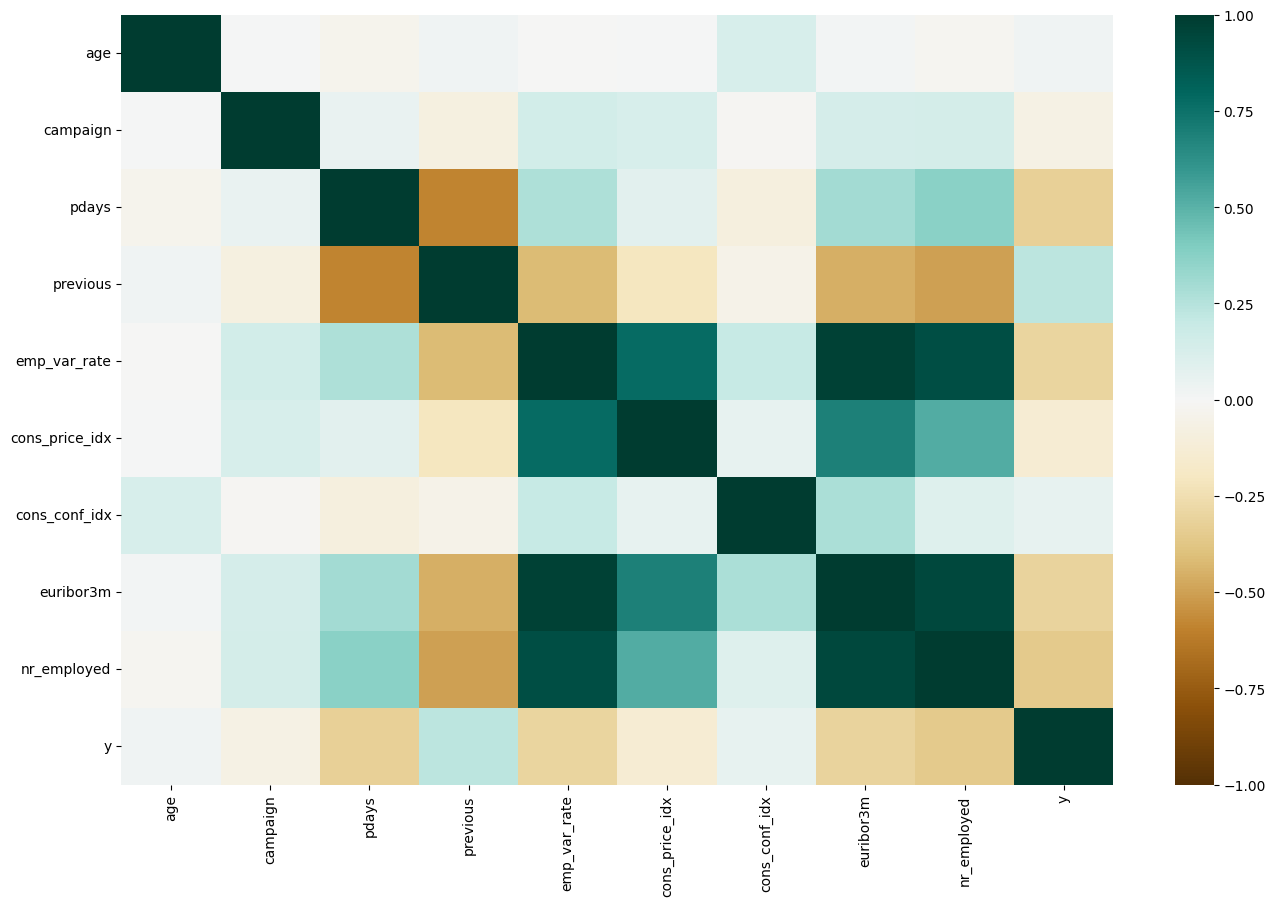

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
fig  = plt.figure(figsize=(16, 10))


sns.heatmap(data[numeric_columns].corr(),
            xticklabels= numeric_columns,
            yticklabels= numeric_columns,
            cmap = "BrBG",
            vmin = -1,
            vmax = 1)

plt.show()

In [11]:
### Избавимся от сильно коррелирующих признаков

def get_redundant_pairs(df):
    """
    Создает множество пар столбцов, которые являются избыточными.

    Параметры:
    df (pandas.DataFrame): DataFrame, для которого нужно создать множество пар столбцов.

    Возвращает:
    set: Множество пар столбцов.
    """
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    """
    Возвращает n самых высоких корреляций между парами столбцов в DataFrame.

    Параметры:
    df (pandas.DataFrame): DataFrame, для которого нужно найти корреляции.
    n (int): Количество корреляций, которые нужно вернуть. По умолчанию равно 5.

    Возвращает:
    pandas.Series: Серия корреляций между парами столбцов.
    """
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print("Top absolut correlations:")
print(get_top_abs_correlations(data[numeric_columns], 10))

Top absolut correlations:
emp_var_rate    euribor3m         0.972245
euribor3m       nr_employed       0.945154
emp_var_rate    nr_employed       0.906970
                cons_price_idx    0.775334
cons_price_idx  euribor3m         0.688230
pdays           previous          0.587514
cons_price_idx  nr_employed       0.522034
previous        nr_employed       0.501333
                euribor3m         0.454494
                emp_var_rate      0.420489
dtype: float64


In [12]:
test = data[numeric_columns].drop(["emp_var_rate", "euribor3m"], axis=1)
get_top_abs_correlations(test, 10)

pdays           previous          0.587514
cons_price_idx  nr_employed       0.522034
previous        nr_employed       0.501333
pdays           nr_employed       0.372605
nr_employed     y                 0.354678
pdays           y                 0.324914
previous        y                 0.230181
                cons_price_idx    0.203130
campaign        nr_employed       0.144095
cons_price_idx  y                 0.136211
dtype: float64

In [13]:
data = data.drop(["emp_var_rate", "euribor3m"], axis=1)
numeric_columns = numeric_columns.drop(["emp_var_rate", "euribor3m"])

In [14]:
### Дисперсионный анализ
### Посмотрим на квазиконстантные признаки

from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(data[numeric_columns])
cutter.get_feature_names_out()

array(['age', 'campaign', 'pdays', 'previous', 'cons_price_idx',
       'cons_conf_idx', 'nr_employed'], dtype=object)

In [15]:
numeric_columns

Index(['age', 'campaign', 'pdays', 'previous', 'cons_price_idx',
       'cons_conf_idx', 'nr_employed', 'y'],
      dtype='object')

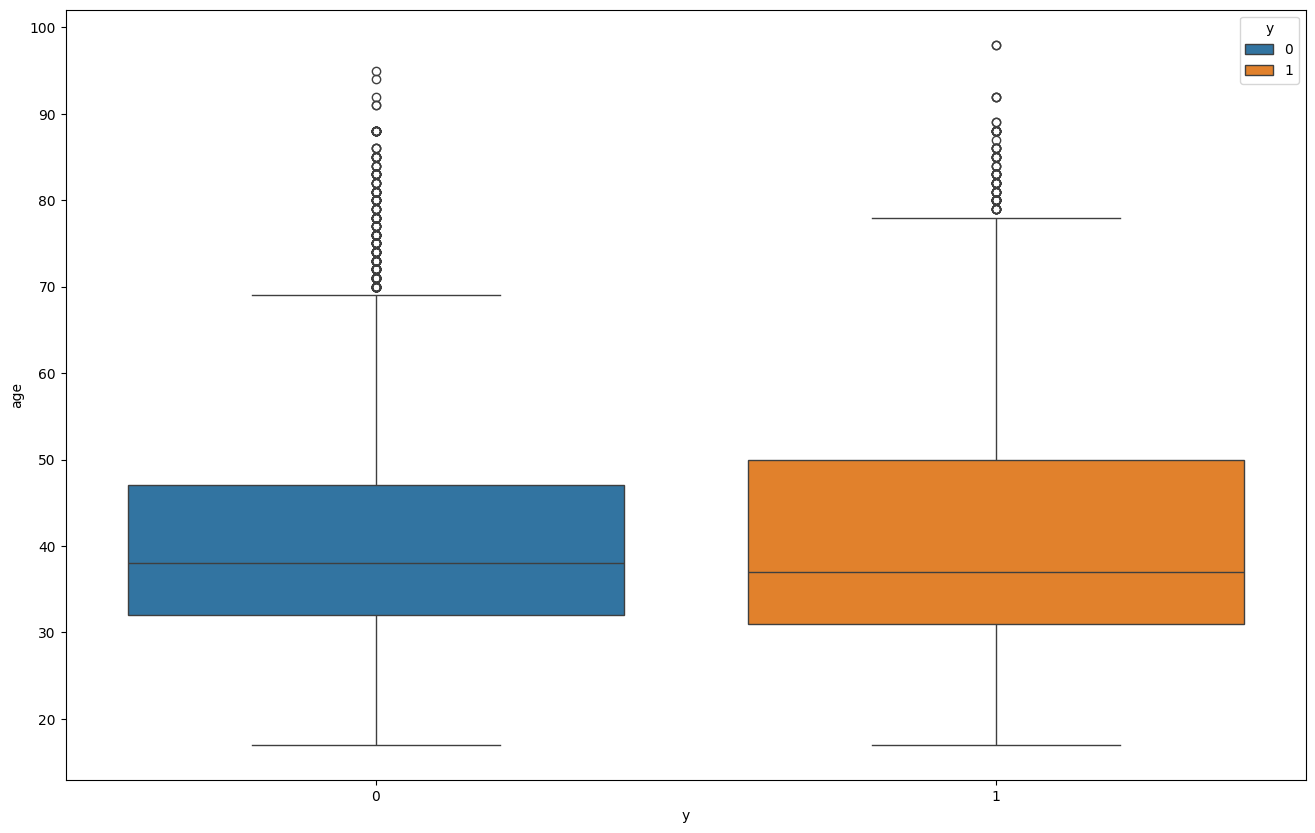

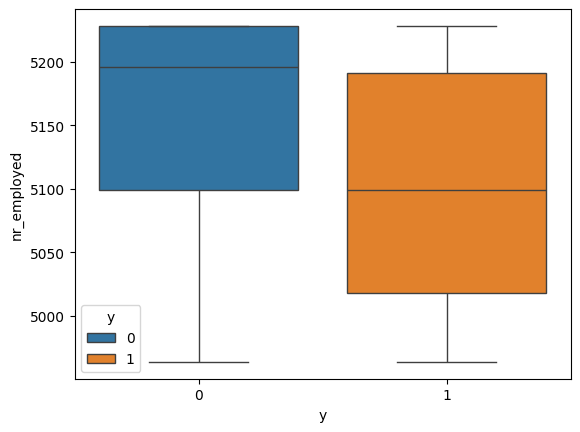

In [16]:
### таргет представим как категорию
### И справним вещественные значения
num_col = ["age", "nr_employed"]
fig = plt.figure(figsize=(16, 10))

for col in num_col:
    sns.boxplot(x = data["y"].astype("category"),
                y = col,
                data = data,
                hue = data["y"].astype("category"))
    
    plt.show()

In [17]:
### Посмотрим на распределение категорий среди разных таргетов

data.describe(include = "object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


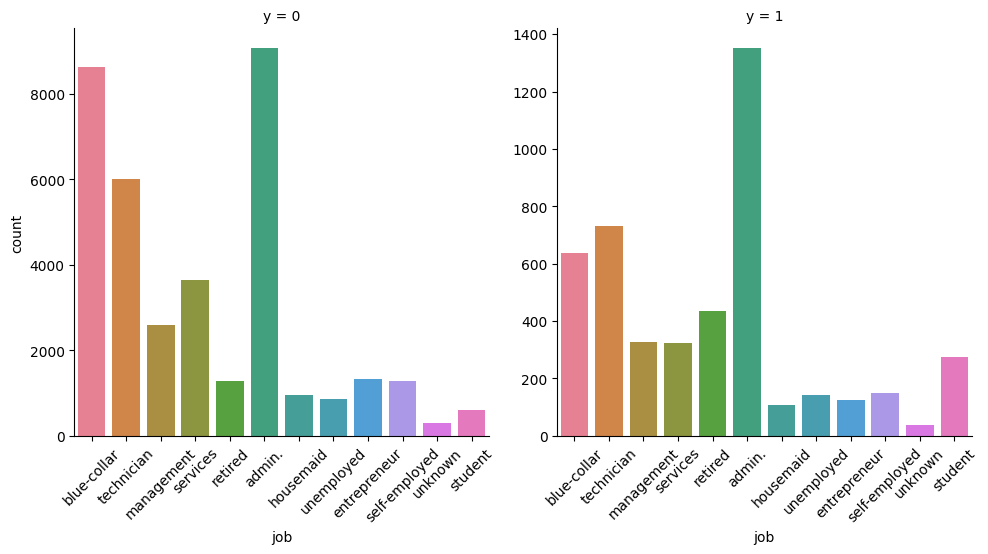

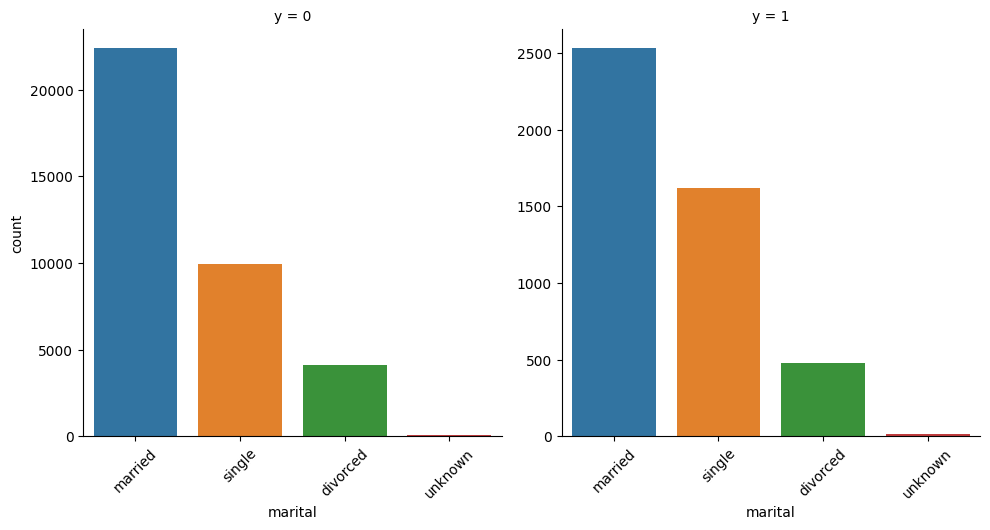

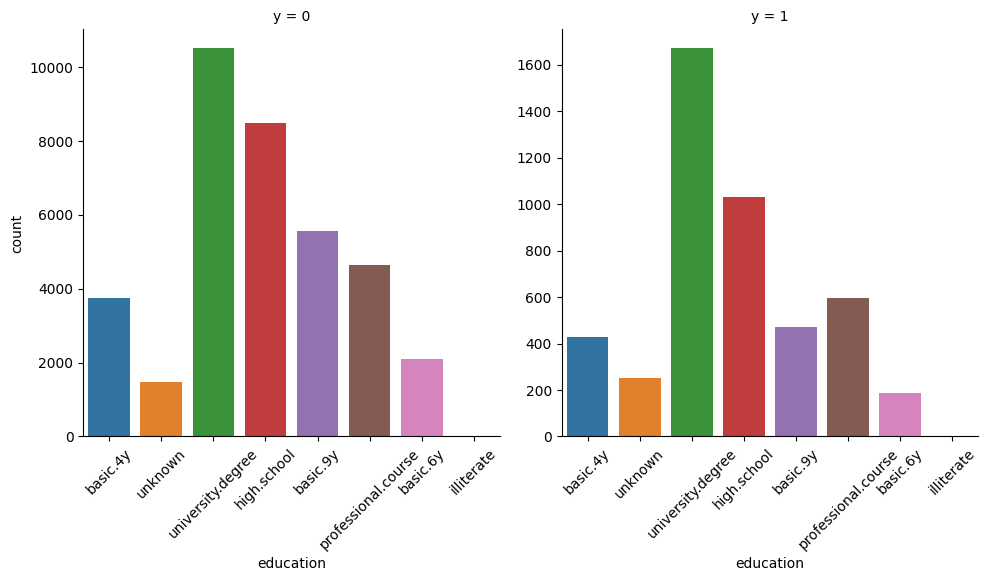

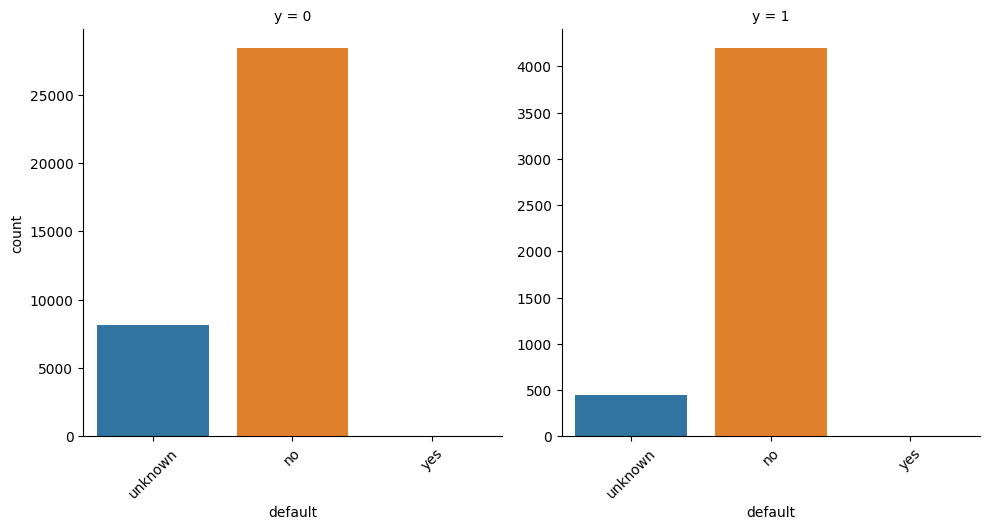

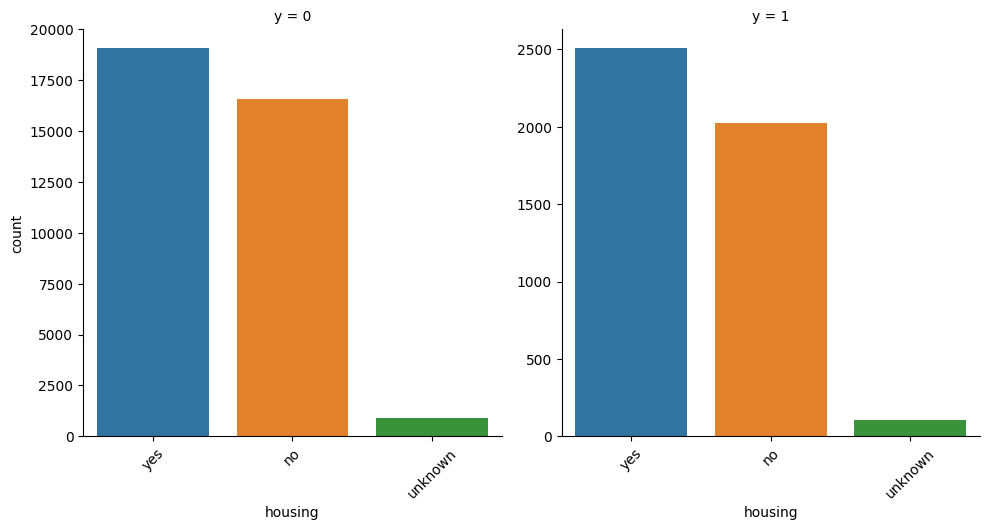

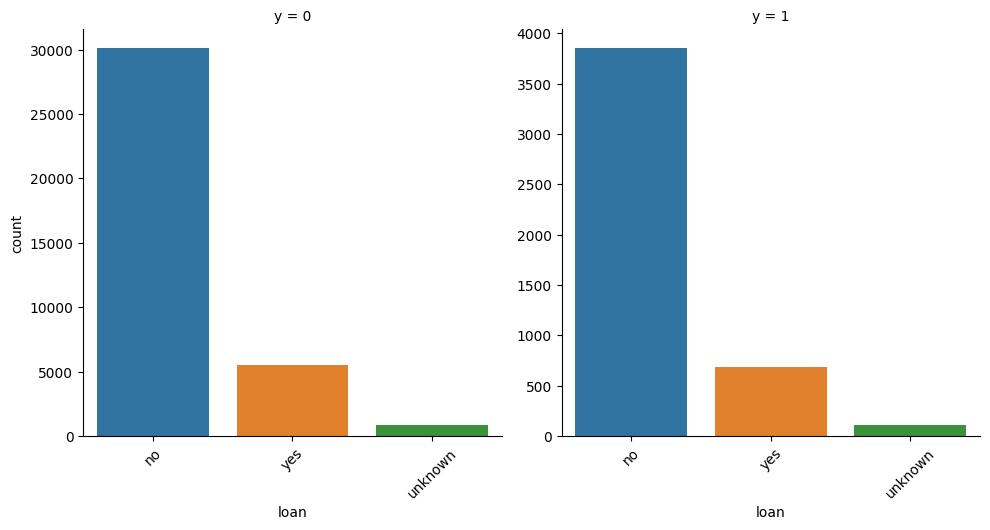

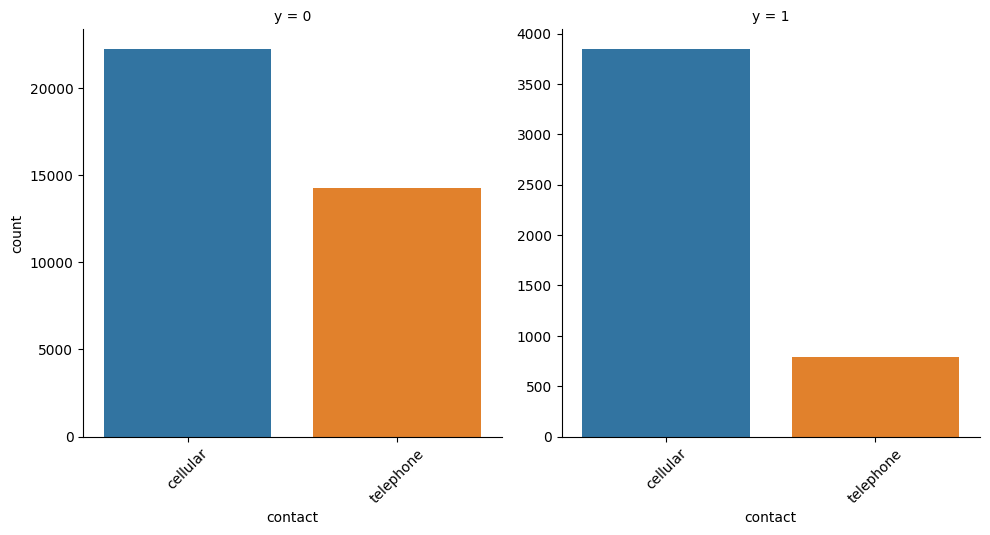

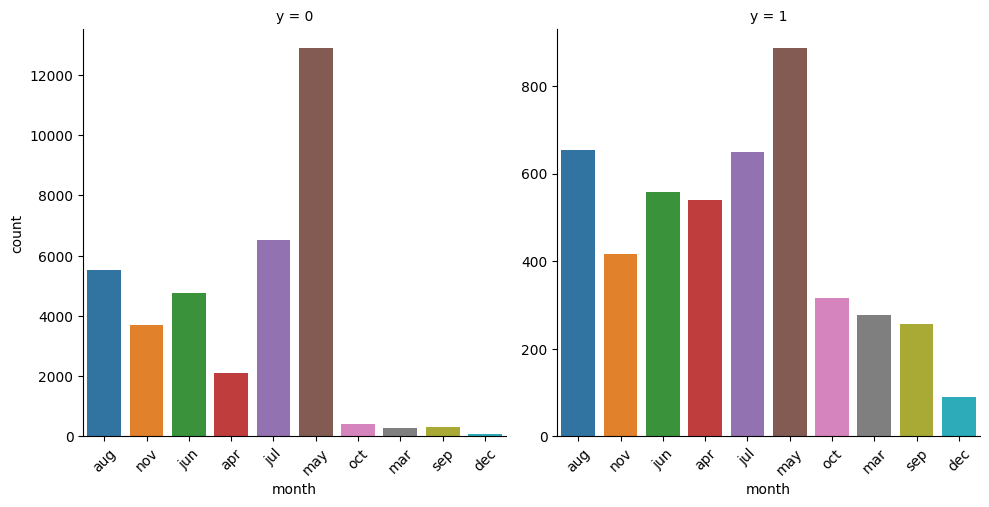

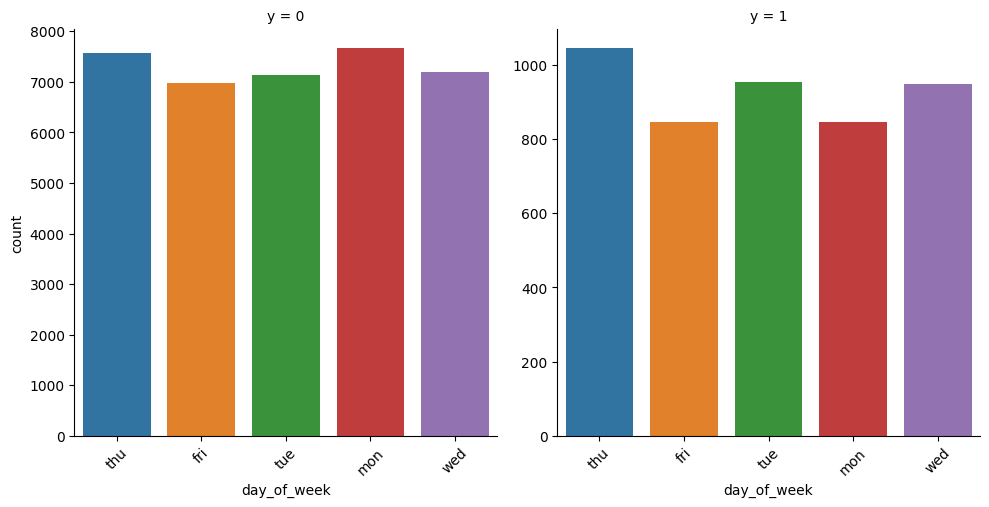

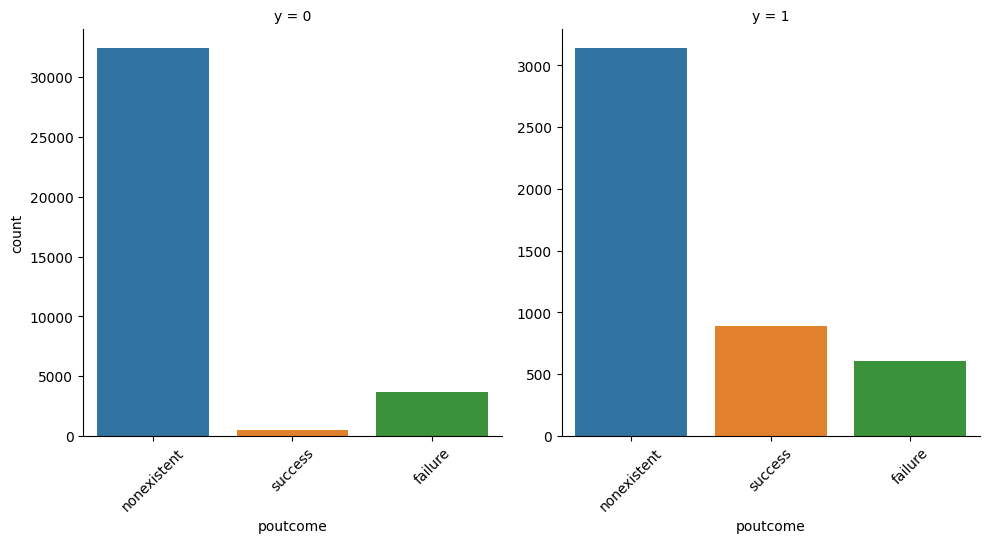

In [18]:
### Гистограммы распределений

for col in categorical_columns:
    g = sns.catplot(x = col,
                    kind = 'count',
                    col=data["y"],
                    data = data,
                    sharey=False,
                    hue = col)
    g.set_xticklabels(rotation=45)


In [19]:
data = data.drop(["loan", "housing", "marital"], axis=1)
categorical_columns = categorical_columns.drop(["loan", "housing", "marital"])

In [20]:
### Закодируем оставшиеся категориальные фичи

data.describe(include = "object")

,job,education,default,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188
unique,12,8,3,2,10,5,3
top,admin.,university.degree,no,cellular,may,thu,nonexistent
freq,10422,12168,32588,26144,13769,8623,35563


In [21]:
for col in categorical_columns:
    if data[col].nunique() < 5:
        ohe_hot = pd.get_dummies(data[col], prefix=col, drop_first=True)
        data = pd.concat((data.drop(col, axis = 1), ohe_hot), axis = 1)
    
    else:
        mean_target = data.groupby(col)["y"].mean()
        data[col] = data[col].map(mean_target)



In [22]:
data.head()

,age,job,education,month,day_of_week,campaign,pdays,previous,cons_price_idx,cons_conf_idx,nr_employed,y,default_unknown,default_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,44,0.068943,0.102490,0.106021,0.121188,1,999,0,93.444,-36.1,5228.1,0,True,False,False,True,False
1,53,0.108260,0.145003,0.101439,0.108087,1,999,0,93.200,-42.0,5195.8,0,False,False,False,True,False
2,28,0.112175,0.137245,0.105115,0.121188,3,6,2,94.055,-39.8,4991.6,1,False,False,False,False,True
3,39,0.081381,0.108355,0.204787,0.108087,2,999,0,93.075,-47.1,5099.1,0,False,False,False,True,False
4,55,0.252326,0.102490,0.106021,0.108087,1,3,1,92.201,-31.4,5076.2,1,False,False,False,False,True


In [23]:
X = data.drop("y", axis = 1)
Y = data["y"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

## Логистическая регрессия

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("LogReg", LogisticRegression(penalty=None))
]
)

pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LogReg', LogisticRegression(penalty=None))])

In [26]:
### Посмотрим на accuracy

pipe.score(X_test, Y_test)

0.8980335032774945

In [27]:
print(pipe.classes_)

[0 1]


In [28]:
print(pipe.predict(X_test.head(1)))

[0]


In [29]:
print(pipe.predict_proba(X_test.head(1)))

[[0.94194983 0.05805017]]


In [30]:
print(pipe.decision_function(X_test.head(1)))

[-2.78664446]


In [31]:
data["y"].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

## Матрица ошибок

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y_test, pipe.predict(X_test)).ravel()

print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)

True Negative:  7152
False Positive:  143
False Negative:  697
True Positive:  246


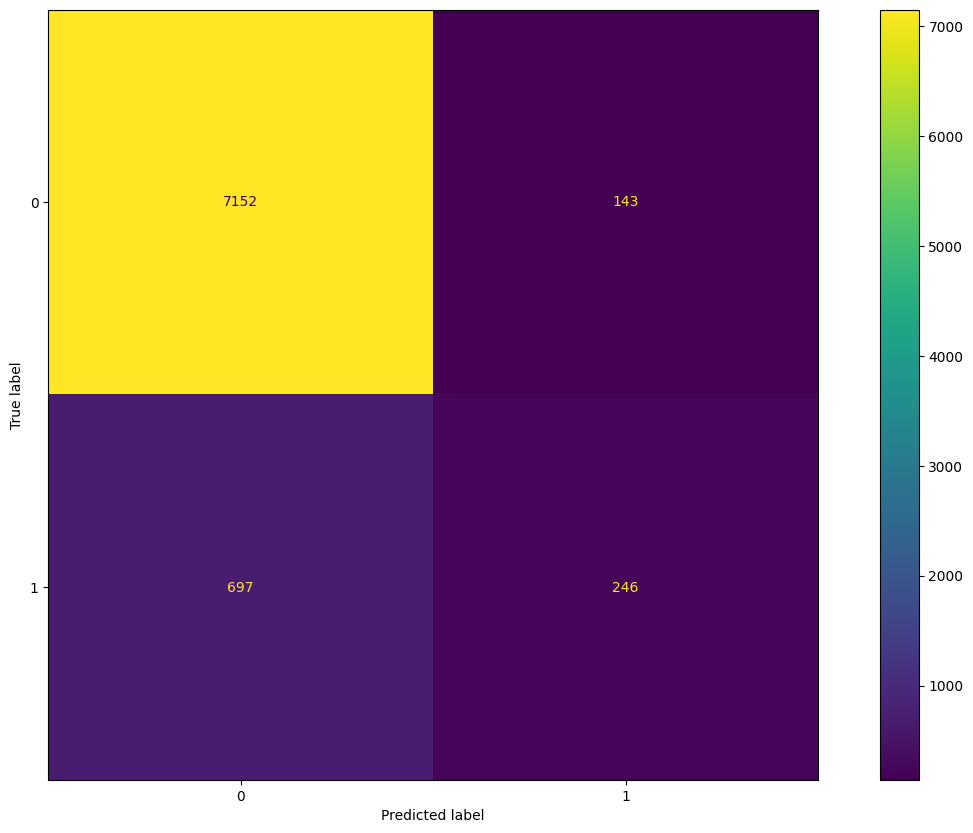

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, pipe.predict(X_test), labels = pipe.classes_)

cmp = ConfusionMatrixDisplay(confusion_matrix = cm)

fig, ax = plt.subplots(figsize=(16,10))
cmp.plot(ax=ax)

plt.show()

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(f"Accuracy score: {accuracy_score(Y_test, pipe.predict(X_test)):.3f}")
print(f"Precision: {precision_score(Y_test, pipe.predict(X_test)):.3f}")
print(f"Recall: {recall_score(Y_test, pipe.predict(X_test)):.3f}")
print(f"F1-value: {f1_score(Y_test, pipe.predict(X_test)):.3f}")


Accuracy score: 0.898
Precision: 0.632
Recall: 0.261
F1-value: 0.369


In [35]:
###  Найдем recall максимизирующий F-меру

from sklearn.metrics import precision_recall_curve

precisiom, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

f_score = 2*precisiom*recall/(precisiom+recall)

print(f"Best F-score {np.max(f_score):.3f}")
print(f"Best threshold {thresholds[np.argmax(f_score)]:.3f}")


Best F-score 0.503
Best threshold 0.186


In [36]:
### При лучшем трэшхолде нарисуем матрицу ошибок

threshold = thresholds[np.argmax(f_score)]
y_pred = (pipe.predict_proba(X_test)[:, 1] > threshold).astype(float)


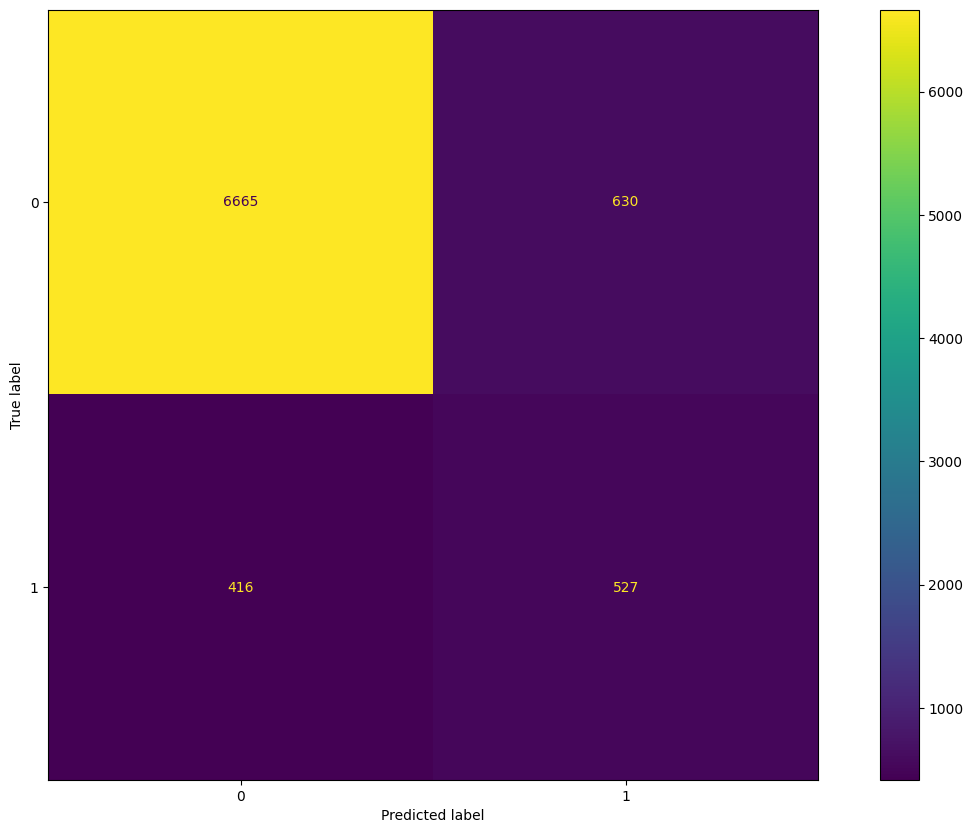

In [37]:
cm = confusion_matrix(Y_test, y_pred, labels = pipe.classes_)

cmp = ConfusionMatrixDisplay(confusion_matrix = cm)

fig, ax = plt.subplots(figsize=(16,10))

cmp.plot(ax=ax)

plt.show()

## ROC и PR

c:\Users\fedor\ML_Pet_projects\Bank Deposit Predictor\venv\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


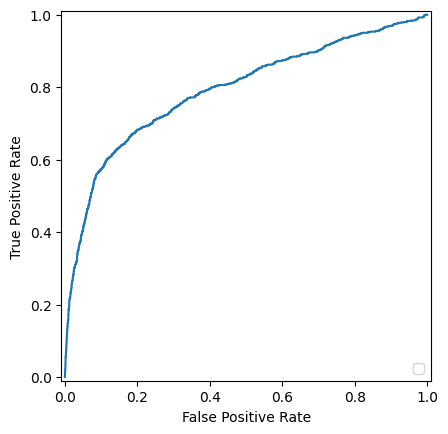

In [38]:
### Пары FTR и TPR

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [39]:
from sklearn.metrics import auc

auc(fpr, tpr)

np.float64(0.7918156002491574)

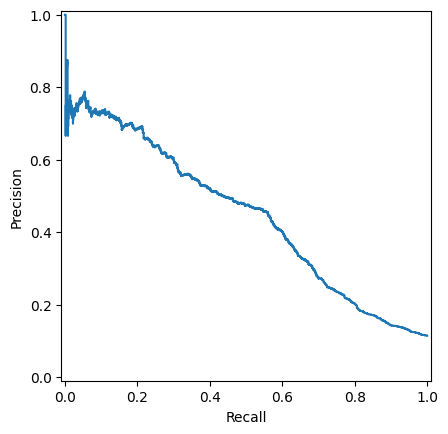

In [40]:
### PR-кривая

from sklearn.metrics import PrecisionRecallDisplay
precision, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [41]:
auc(recall, precision)

np.float64(0.4464290696992666)

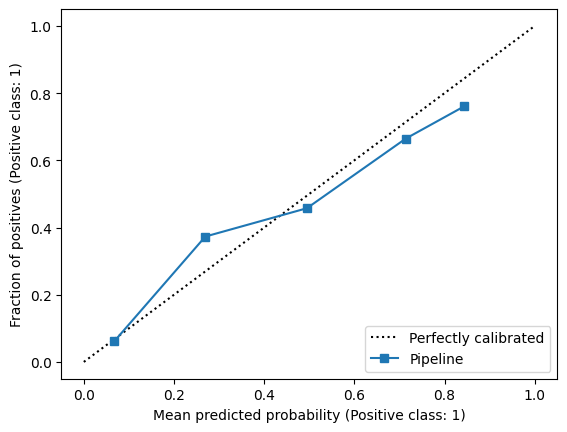

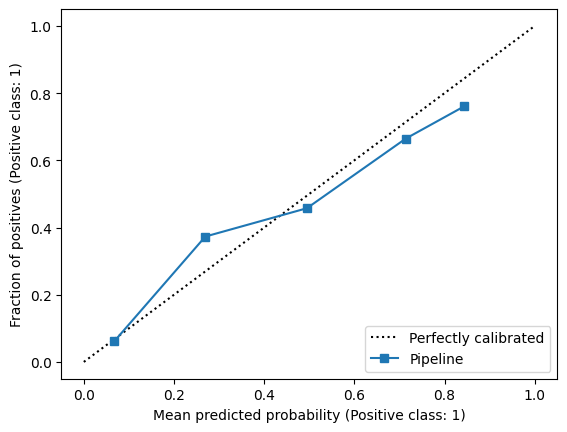

In [42]:
from sklearn.calibration import CalibrationDisplay

CalibrationDisplay.from_estimator(pipe, X_test, Y_test).plot()

In [43]:
pipe.predict_proba(X_test.head(1))

array([[0.94194983, 0.05805017]])

## SVM

In [45]:
from sklearn.svm import LinearSVC

pipe_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("SVM", LinearSVC())
])

pipe_svm.fit(X_train, Y_train)

pipe_svm.score(X_test, Y_test)

0.8980335032774945

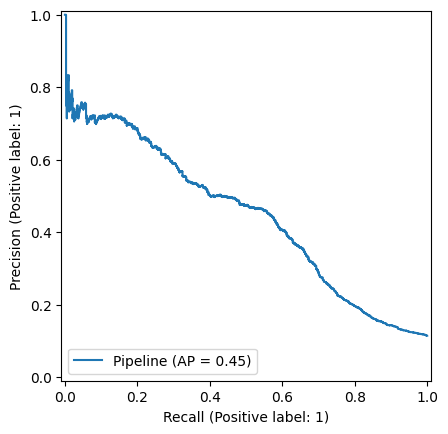

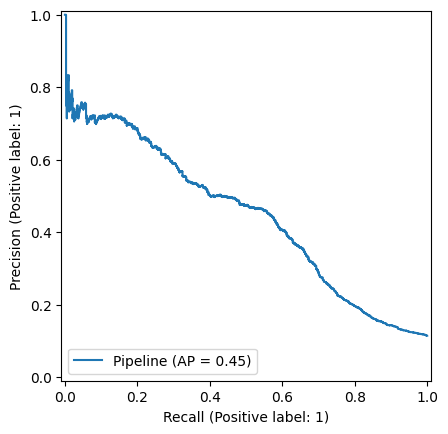

In [57]:
PrecisionRecallDisplay.from_estimator(pipe_svm, X_test, Y_test).plot()

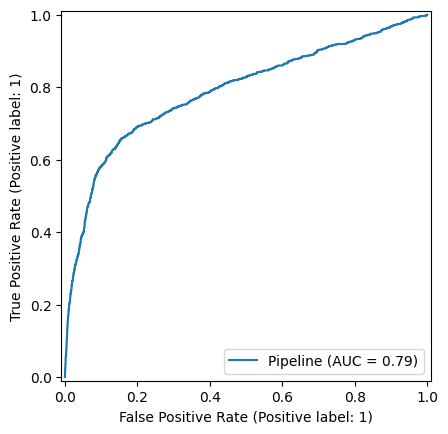

In [58]:
RocCurveDisplay.from_estimator(pipe_svm, X_test, Y_test)

In [59]:
### преобразуем выходы модели в вероятности

pipe_svm.decision_function(X_test.head(2))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


pred_prob = sigmoid(pipe_svm.decision_function(X_test))


In [60]:
min(pred_prob), max(pred_prob)

(np.float64(0.2324545544702104), np.float64(0.6983416060275263))

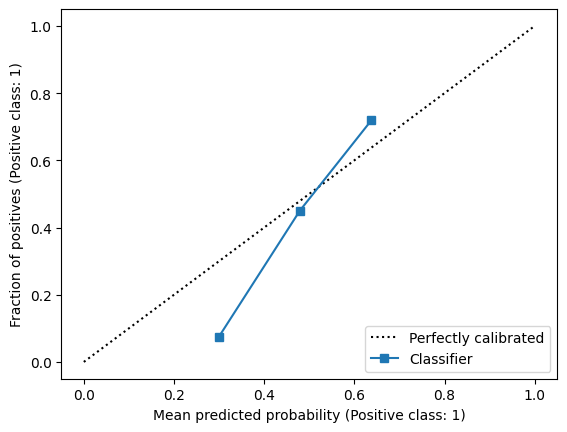

In [61]:
CalibrationDisplay.from_predictions(Y_test, pred_prob)

In [62]:
### Калибровка  Платта

from sklearn.calibration import CalibratedClassifierCV

calibration = CalibratedClassifierCV(pipe_svm, cv=5, method="sigmoid")
calibration.fit(X_train, Y_train)


calibrated_probs = calibration.predict_proba(X_test)[:, 1]

calibrated_probs



array([0.06922077, 0.05045449, 0.06340752, ..., 0.05989917, 0.24812868,
       0.2695311 ], shape=(8238,))

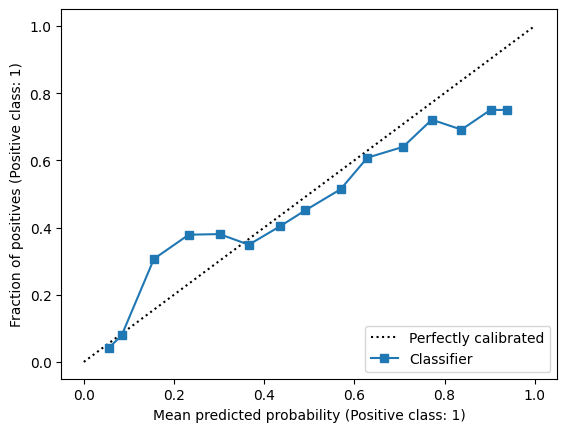

In [63]:
CalibrationDisplay.from_predictions(Y_test, calibrated_probs, n_bins = 15)